# Analyzing and preparing the new OekoFor Test Data

### Imports

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np

The labels are .csv files and the audio files are .flac

### Variables

In [2]:
LABELS = "../../models/Oekofor-Testset/labels"
AUDIOS = "../../models/Oekofor-Testset/audio_files"

In [3]:
SPECIES = {}
CALL_TYPES_PER_SPECIES = {}
RECORDING_SITES = {}
SPECIES_PER_RECORDING_SITES = {}

### Create Dataframe from all files

In [4]:
# Initialize an empty dataframe
df = pd.DataFrame()

# Loop through the files in the LABELS directory
for file_name in os.listdir(LABELS):
    if file_name.endswith('.csv'):
        file_path = os.path.join(LABELS, file_name)
        temp_df = pd.read_csv(file_path)
        df = pd.concat([df, temp_df], ignore_index=True)

# Display the dataframe
df.head()

,audio_filename,start_time,end_time,low_freq,high_freq,lat,long,GPS_uncertainty_km,project_code,recorder,...,tsn_code,GBIF_ID,common_name,scientific_name,subspecies,microphone,source,recordist,validator,validation_time
0,SN057_2019_04_20_20_27_40_evening,0.06,2.25,1150.9,3025.2,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,179757.0,2490719.0,Eurasian Blackbird,Turdus merula,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06
1,SN057_2019_04_20_20_27_40_evening,0.06,6.02,1479.4,9788.2,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,563604.0,7901064.0,Song Thrush,Turdus philomelos,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06
2,SN057_2019_04_20_20_27_40_evening,4.01,4.30,2986.6,4377.8,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,562129.0,2493091.0,Common Chiffchaff,Phylloscopus collybita,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06
3,SN057_2019_04_20_20_27_40_evening,7.11,7.41,2870.6,4184.6,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,562129.0,2493091.0,Common Chiffchaff,Phylloscopus collybita,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06
4,SN057_2019_04_20_20_27_40_evening,5.78,6.07,2947.9,4223.2,50.1713,8.0367,0,WiWa_2019_2020,019SN057,...,562129.0,2493091.0,Common Chiffchaff,Phylloscopus collybita,NaN,soundscape,OekoFor,OekoFor,Ralph Martin,2024-11-06


# Analysis

## File amount

In [5]:
print(f"Number of rows in the dataframe: {len(df)}")
print(f"Number of unique files in the dataframe: {len(df['audio_filename'].unique())}")
print(f"Number of files in labels directory: {len(os.listdir(LABELS))}")

Number of rows in the dataframe: 16020
Number of unique files in the dataframe: 153
Number of files in labels directory: 153


## Metadata list

In [6]:
print("Columns in the dataframe:")
for column in df.columns:
    print(f"- {column}")

Columns in the dataframe:
- audio_filename
- start_time
- end_time
- low_freq
- high_freq
- lat
- long
- GPS_uncertainty_km
- project_code
- recorder
- pointofvocalization
- vocalization_type
- sex
- correct
- time_UTC
- ebird_code
- tsn_code
- GBIF_ID
- common_name
- scientific_name
- subspecies
- microphone
- source
- recordist
- validator
- validation_time


## Species amount

In [7]:
SPECIES = df['common_name'].value_counts().to_dict()

print("Common name counts:")
print(SPECIES)



unique_common_names = len(SPECIES.keys())
unique_ebird = df['ebird_code'].unique()

print(f"Number of unique common names: {unique_common_names}")
print(f"Number of ebird codes: {len(unique_ebird)}")

Common name counts:
{'Eurasian Blackbird': 2659, 'Common Chaffinch': 1906, 'European Robin': 1604, 'Song Thrush': 1596, 'Eurasian Blackcap': 1051, 'Bird': 941, 'Common Chiffchaff': 907, 'Eurasian Blue Tit': 566, 'Great Tit': 504, 'Eurasian Wren': 462, 'Mistle Thrush': 405, 'Common Firecrest': 370, 'Coal Tit': 301, 'Goldcrest': 295, 'Eurasian Nuthatch': 229, 'Marsh Tit': 205, 'Yellowhammer': 198, 'Eurasian Bullfinch': 160, 'Red Crossbill': 151, 'Great Spotted Woodpecker': 147, 'Spotted Flycatcher': 142, 'Willow Warbler': 133, 'Crested Tit': 100, 'Dunnock': 98, 'Hawfinch': 81, 'Common Cuckoo': 79, 'Tree Pipit': 67, 'Eurasian Treecreeper': 62, 'Short-toed Treecreeper': 61, 'Common Wood-Pigeon': 60, 'Tawny Owl': 53, 'Brambling': 51, 'European Starling': 48, 'Eurasian Siskin': 43, 'Black Woodpecker': 38, 'Eurasian Jay': 30, 'Common Raven': 24, 'Garden Warbler': 24, 'Willow Tit': 21, 'Eurasian Green Woodpecker': 19, 'Redwing': 14, 'European Roe Deer': 14, 'Carrion Crow': 13, 'European Pied F

Visualisation

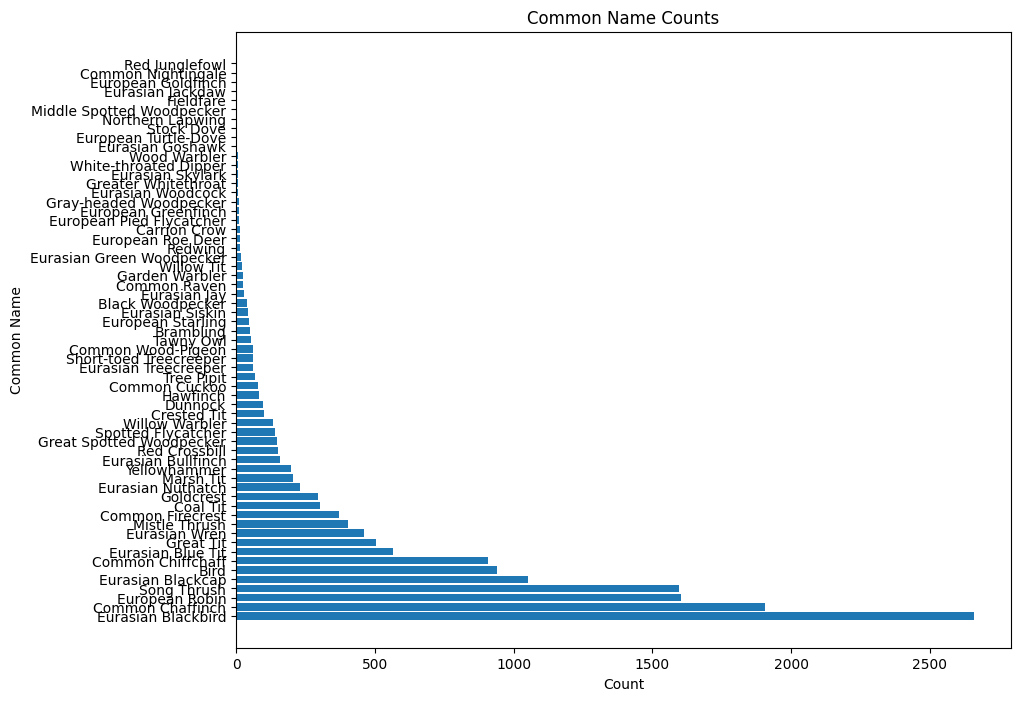

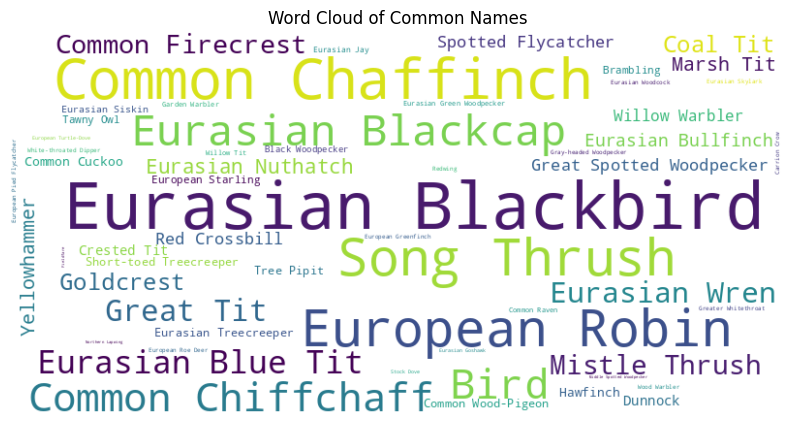

In [8]:
# Plot the common names and their counts
plt.figure(figsize=(10, 8))
plt.barh(list(SPECIES.keys()), list(SPECIES.values()))
plt.xlabel('Count')
plt.ylabel('Common Name')
plt.title('Common Name Counts')
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(SPECIES)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Names')
plt.show()

## Distribution of call types per species

In [9]:
# Group by common_name and vocalization_type, then count occurrences
print(df['vocalization_type'].value_counts())

CALL_TYPES_PER_SPECIES = df.groupby(['common_name', 'vocalization_type']).size().unstack(fill_value=0)

# Display the distribution
CALL_TYPES_PER_SPECIES.head()

vocalization_type
song                 11078
contact call          3006
something              651
alarm call             592
flight call            411
air alarm call         107
drumming                85
sub song                41
excitement call         41
call                     5
vocal                    1
ground alarm call        1
whistle                  1
Name: count, dtype: int64


vocalization_type,air alarm call,alarm call,call,contact call,drumming,excitement call,flight call,ground alarm call,something,song,sub song,vocal,whistle
common_name,,,,,,,,,,,,,
Bird,107,44,0,151,0,0,1,0,622,16,0,0,0
Black Woodpecker,0,0,0,28,0,2,7,0,0,1,0,0,0
Brambling,0,0,0,14,0,0,5,0,0,32,0,0,0
Carrion Crow,0,0,0,13,0,0,0,0,0,0,0,0,0
Coal Tit,0,0,0,8,0,0,0,0,5,288,0,0,0


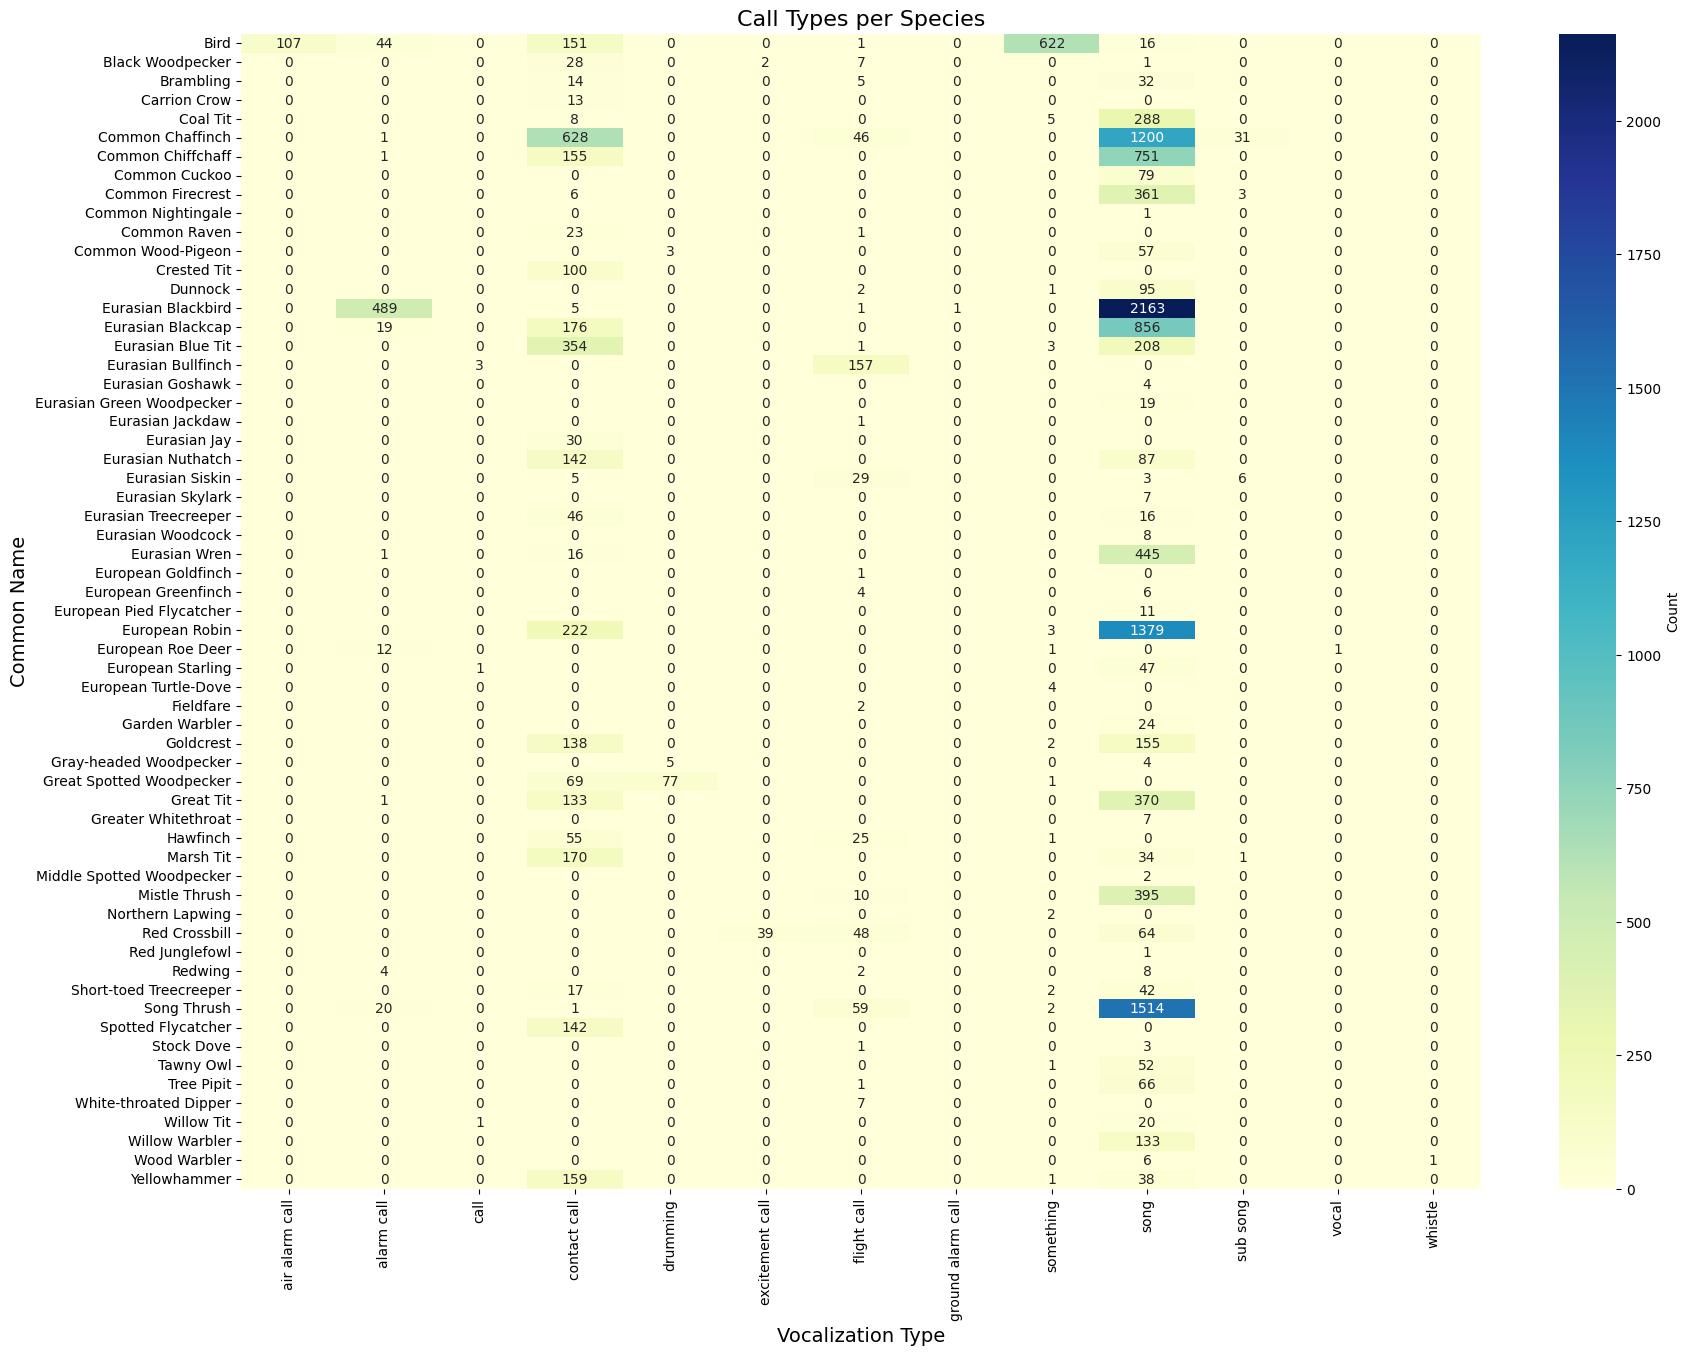

In [10]:
plt.figure(figsize=(20, 15))

# Create a heatmap
sns.heatmap(CALL_TYPES_PER_SPECIES, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Count'})

# Set the labels and title
plt.xlabel('Vocalization Type', fontsize=14)
plt.ylabel('Common Name', fontsize=14)
plt.title('Call Types per Species', fontsize=16)

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Display the plot
plt.show()

## Number of recording sites

I assumed that recorder refers to different recording devices and therefore recording sites

recorder
019SN057    749
019SN050    637
019SN075    507
019SN076    473
019SN009    461
           ... 
019SN089     26
020SN012     25
020SN061      9
020SN019      9
020SN016      9
Name: count, Length: 82, dtype: int64


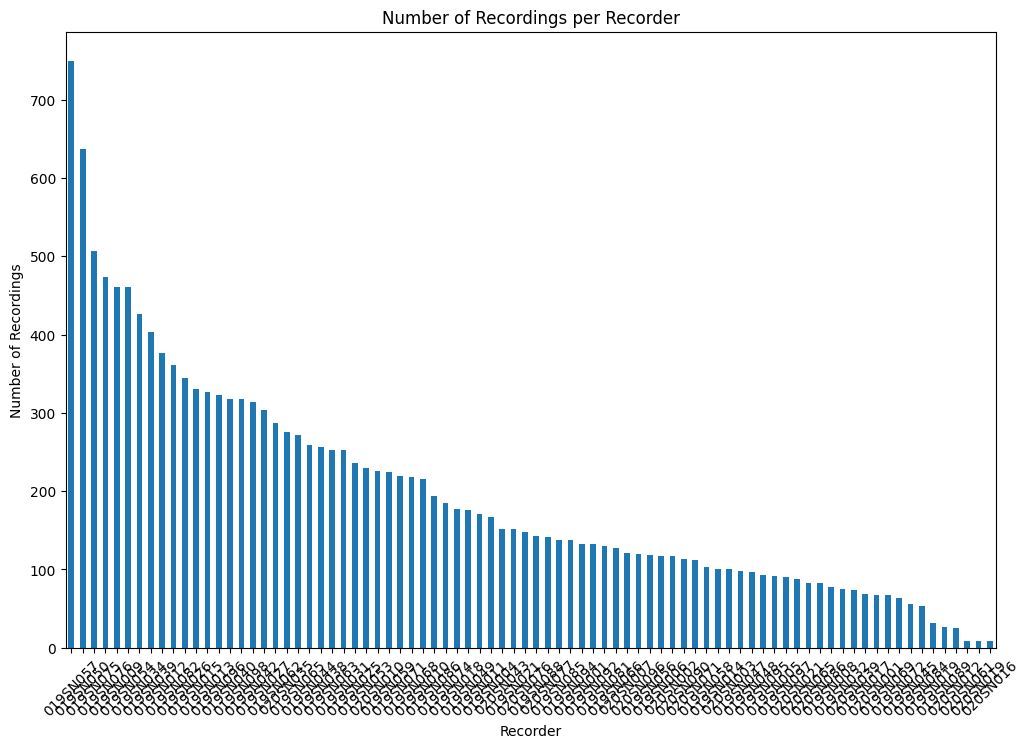

In [11]:
RECORDING_SITES = df['recorder'].value_counts()
print(RECORDING_SITES)

# Plot the number of recordings per recorder
plt.figure(figsize=(12, 8))
RECORDING_SITES.plot(kind='bar')
plt.xlabel('Recorder')
plt.ylabel('Number of Recordings')
plt.title('Number of Recordings per Recorder')
plt.xticks(rotation=45)
plt.show()

## Distribution of species to recording site

In [12]:
SPECIES_PER_RECORDING_SITES  = df.groupby(['common_name', 'recorder']).size().unstack(fill_value=0)

# Display the distribution
SPECIES_PER_RECORDING_SITES .head()

recorder,019SN001,019SN004,019SN005,019SN006,019SN008,019SN009,019SN010,019SN011,019SN012,019SN013,...,020SN039,020SN043,020SN061,020SN065,020SN071,020SN076,020SN077,020SN086,020SN090,020SN096
common_name,,,,,,,,,,,,,,,,,,,,,
Bird,1,2,0,0,0,15,0,43,0,3,...,0,14,7,6,1,12,13,5,1,16
Black Woodpecker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brambling,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Carrion Crow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Coal Tit,17,17,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Log scale!

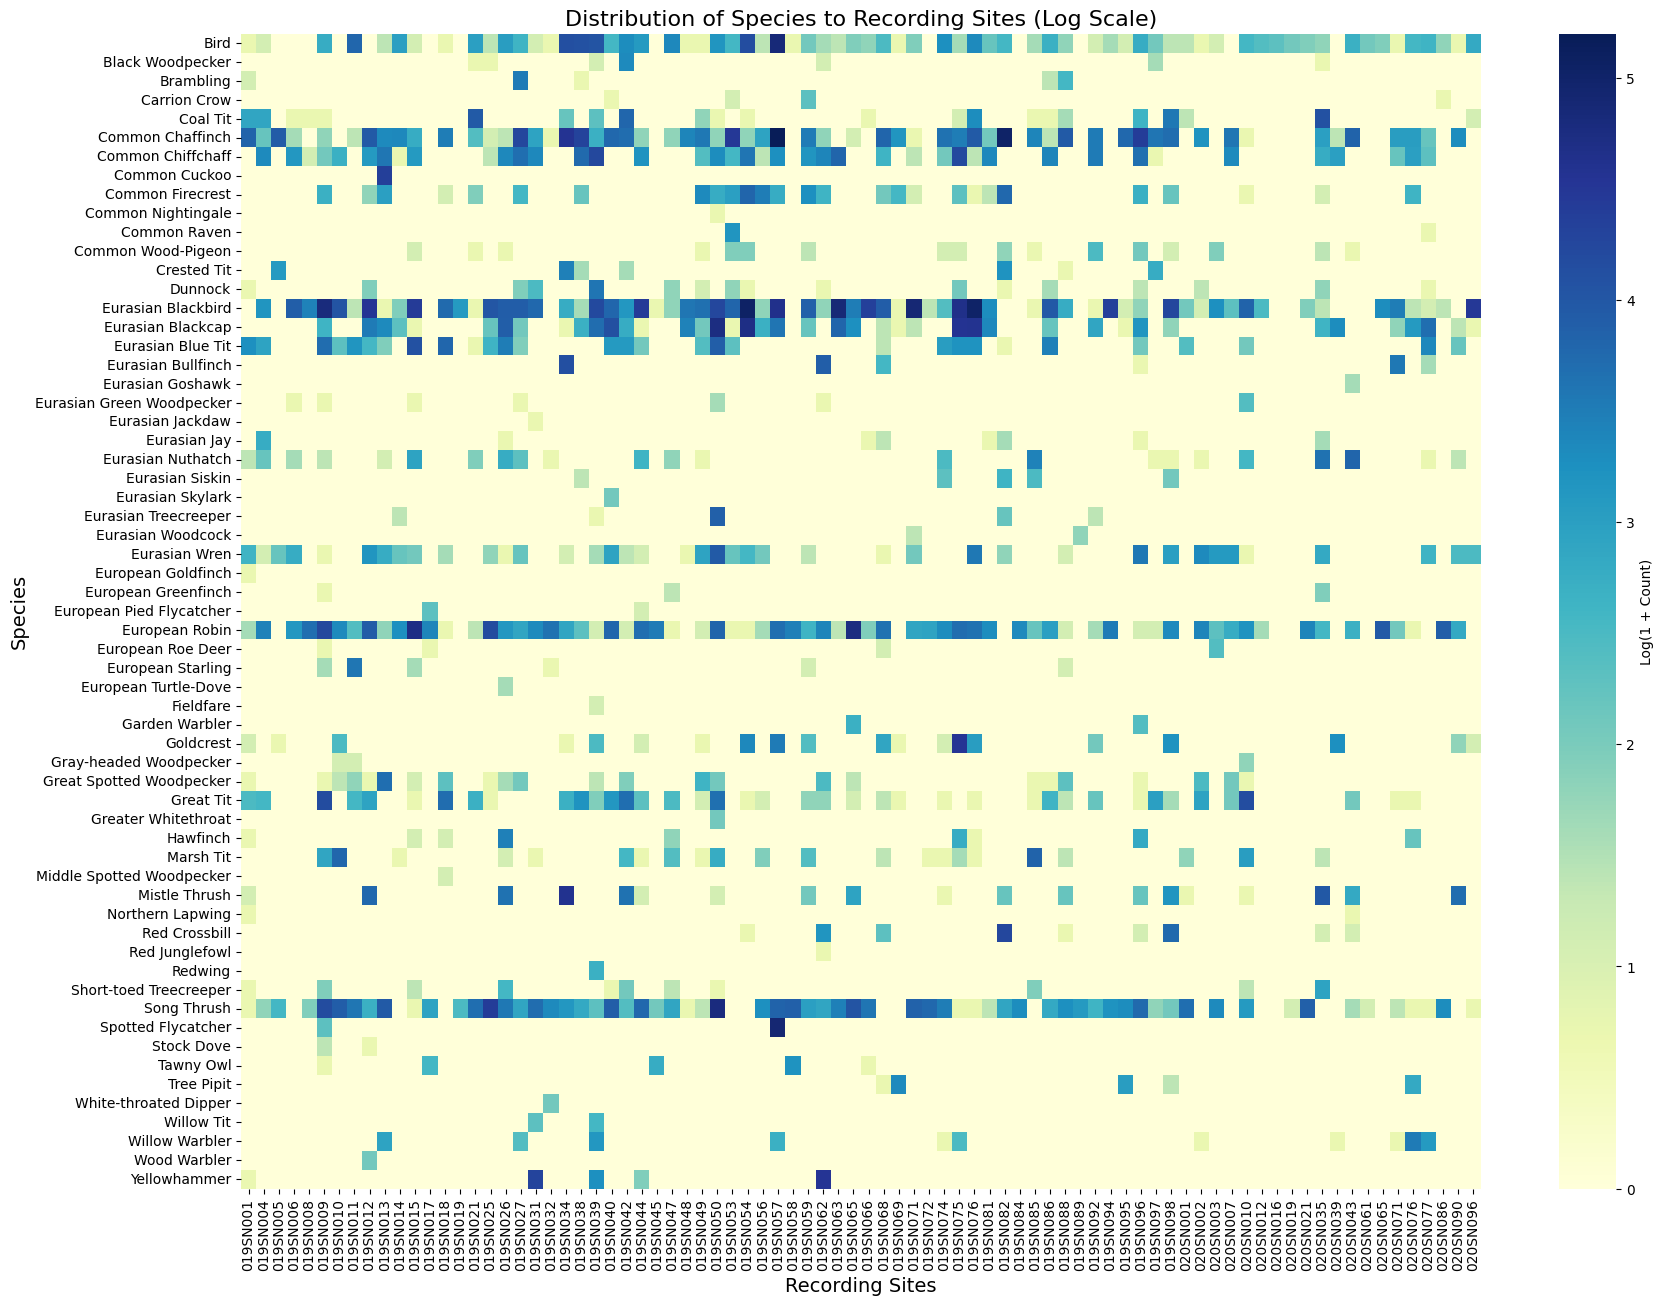

In [15]:
log_data = np.log1p(SPECIES_PER_RECORDING_SITES)

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(log_data, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Log(1 + Count)'})

plt.xlabel('Recording Sites', fontsize=14)
plt.ylabel('Species', fontsize=14)
plt.title('Distribution of Species to Recording Sites (Log Scale)', fontsize=16)

plt.yticks(fontsize=10)

plt.show()